In [ ]:
# Mencoba membuat ulang notebook salah satu kompetitor di kaggle : Manav seghal
# https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [ ]:
# upload file ke colab
from google.colab import files
uploaded = files.upload()

Saving titanic.zip to titanic.zip


In [ ]:
# file yg sudah di upload di extract
import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['titanic.zip']), "r")
zf.extractall()

In [ ]:
# import library yg dibutuhkan

# library untuk operasi data
import pandas as pd
import numpy as np
import random as rnd

# library visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# library model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# pengubahan file csv menjadi dataframe pandas
# menggunakan array combine untuk memudahkan jika ada operasi yang menggunakan data train dan test bersamaan
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [ ]:
# head pada train
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Titanic
Analisis Titanic oleh Manav Sehgal.
Mencoba menulis ulang apa yang sudah dibuat oleh Manav Sehgal.

# Tahapan
Ada 7 tahapan yang dijelaskan dalam buku Data science

* Definisi pertanyaan atau masalah
* Mendapatkan data training dan testing
* Memetakan, mempersiapkan, dan membersihkan Data
* Analisis, Identifikasi pola, dan eksplor data
* Buat model, prediksi, dan selesaikan masalah
* Visualisasikan, laporkan, dan sajikan tahapan pemecahan masalah dan solusi final.
* Berikan atau kirimkan hasilnya

Alur kerja tersebut menunjukkan urutan umum bagaimana setiap tahapan mengikuti tahap lainnya. Namun ada kasus tertentu.

* Kita dapat menggabungkan beberapa tahapan alur kerja, misalnya kita dapat menganalisa dengan cara visualisasi data.

* Melakukan sebuah tahapan lebih awal dari yang ditunjukkan.Kita dapat meng analisis data sebelum dan sesudah pemetaan (data)

* Melakukan sebuah tahapan berulang kali. Tahapan visualisasi dapat digunakan beberapa kali.

* Tidak menggunakan sebuah tahapan sama sekali. Kita mungkin tidak memerlukan tahap supply untuk produksi atau layanan untuk sebuah kompetisi.

# Pertanyaan dan definisi masalah

Situs kompetisi seperti kaggle menentukan masalah yang harus diselesaikan atau pertanyaan yang harus diajukan sambil menyediakan kumpulan data untuk melatih model data science anda dan menguji hasil tersebut terhadap data test.

Definisi masalah atau pertanyaan untuk kompetisi titanic survival kompetisi adalah :

Diketahui dari training terdapat data dari penumpang yang selamat atau tidak. Bisakah model kita memprediksi data test apakah seorang penumpang selamat atau tidak.




Berikut ini adalah penekanan terkait masalah titanic :

* Pada 15 April 1912, saat pelayaran pertama, kapal Titanic tenggelam setelah bertabrakan dengan gunung es, membunuh 1502 orang dari 2224 penumpang. 32% Keselamatan.

* Salah satu alasan tidak banyak yang terselamatkan adalah karena tidak cukup nya sekoci untuk penumpang dan awak kapal.

* Meskipun ada sedikit keberuntungan pada orang yang berhasil selamat, beberapa grup orang lebih mungkin selamat dari yang lain seperti, wanita, anak-anak, dan orang golongan atas.



# Tujuan dari tahapan

Tahapan dari solusi data science menyelesaikan 7 masalah utama :

* **Classifying / klasifikasi**. Kita mungkin ingin mengklasifikasi atau mengkategorikan sample yang kita miliki. Kita mungkin juga ingin memahami implikasi dan korelasi dari kelas yang berbeda dengan tujuan solusi kita.

* **Correlating / Korelasi**. Seseorang dapat melakukan pendekatan masalah berdasarkan fitur yang tersedia dalam dataset pelatihan. Fitur mana dalam dataset yang sangat berpengaruh pada solusi kita?  Secara statistik apakah ada korelasi antara fitur dan tujuan solusi? Saat nilai fitur berubah, status solusi juga berubah, dan sebaliknya? Hal ini dapat diuji baik untuk fitur numerik dan kategorikal dalam set data yang diberikan. Kita juga mungkin ingin menentukan korelasi antara fitur-fitur selain keselamatan untuk tujuan dan tahapan selanjutnya. Mengkorelasikan fitur tertentu dapat membantu dalam membuat, melengkapi, atau mengkoreksi fitur.

* **Converting / konversi**. Untuk tahapan modelling, seseorang perlu menyiapkan data. Tergantung pada algoritma model, seseorang mungkin memerlukan semua fitur untuk dikonversikan kenilai numerik yang setara. Misalna mengubah nilai kategorial text menjadi nilai numerik.

* **Completing // Melengkapi**. Persiapan data mungkin juga memerlukan kita untuk memperkirakan nilai apapun yang hilang dalam suatu fitur. Model algoritma dapat bekerja sangat efektif jika tidak ada nilai yang hilang.

* **Correcting / Koreksi**. Kita dapat juga menganalisa data training yang diberikan untuk error atau nilai yang tidak akurat dalam fitur-fitur dan mencoba untuk mengoreksi nilai-nilai ini ATAU mengeluarkan sample yang mengandung kesalahan. Salah satu cara untuk melakukannya adalah mendeteksi pencilan/outliers diantara sampel atau fitur. kita juga dapat membuang fitur sepenuhnya jika tidak berkontribusi pada analisis atau mungkin secara signifikan menggangu hasil.

* **Creating/Membuat**. Bisakah kita membuat fitur baru berdasaarkan fitur yang telah ada atau dari sekumpulan sebuah fitur, seperti fitur baru yang mengikuti korelasi, konversi, tujuan kelengkapan.

* **Charting / Grafik**. Bagaimana cara memilih visualisasi plot dan chart yang tepat tergantung pada sifat data dan tujuan solusi.

# Tambahan

* Hampir 30% penumpang memiliki saudara atau/dan pasangan.


In [ ]:
# print fitur yang ada di dataframe
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# tail dari data train
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# dataframe. .info() yang bertujuan untuke memberikan informasi seperti tipe data dan jumlah nilai yang kosong pada sebuah fitur
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
# .describe() untuk membuat analisis count(jumlah data yang tidak kosong),center measurement (mode, median, mean) dan spread measurement (std, range (max-min)) , dan quartile
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# .describe(include=['O']) membuat analisis untuk fiture bertipe kategori non-numerik
# count : jumlah data non null (tidak kosong)
# uniue : jumlah data yang unik (contoh biner, hanya ada 2)
# top : unique yang paling banyak
# freq : jumlah kemunculan top
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Risien, Mr. Samuel Beard",male,1601,G6,S
freq,1,577,7,4,644


In [ ]:
# menghitung tingkat survive=1(karena hanya 2 kelas dan biner) pada fitur kategori Pclass dalam persen
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# survive dengan sex
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# sibsp dengan survived
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# parch dengan survived
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


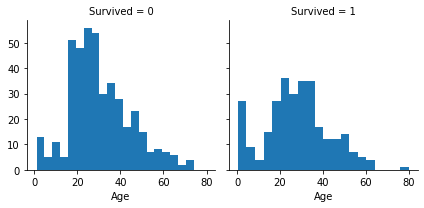

In [ ]:
# visualisasi histogram distribusi jumlah orang selamat berdasarkan age
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
# mengelompokkan umur menjadi 20 kelompok, survive dan not berbeda pengelompokkannya karena max berbeda
# penegelompokkan ini hanya untuk visualisasi saja, di data train nanti peneglompokkan dibuat dengan batas2 yang ditentukan, sehingga tidak seperti di bawah

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


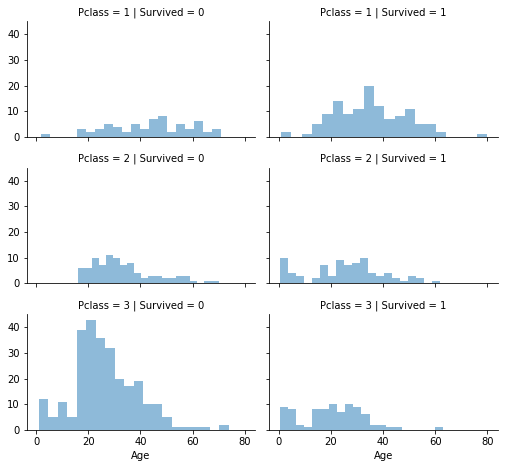

In [ ]:
# visualisasi histogram untuk jumlah selamat berdasarkan age, namun dibagi berdasarkan pclass
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


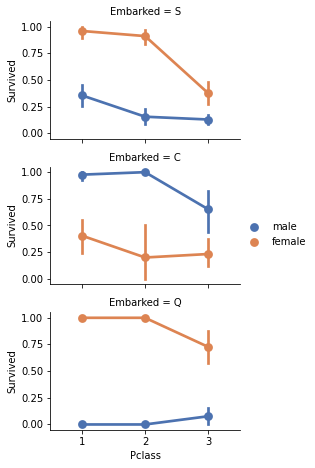

In [ ]:
# visualisasi persen selamat berdasarkan pclass di bagi berdasarkan embarked
# sns.facetgrid() untuk membuat grid visualissasi (bisa sns bisa plt )
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


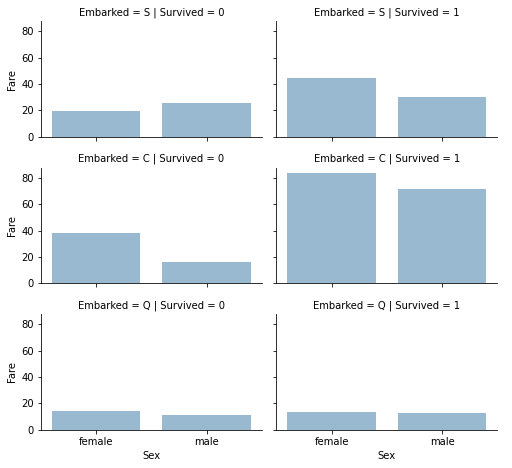

In [ ]:
# size adalah ukuran, aspect adalah lebar mapping
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [ ]:
# drop fitur yang dinilai tidak penting/ tidak ada pengaruh
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [ ]:
# ekstraksi fitur : pengambilan title dari nama
for dataset in combine :
  dataset['Title'] = dataset.Name.str.extract(' ([A-Z a-z]+)\.', expand=False)

# mengumpulkan title dan membuat jumlah selamat setiap title
pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,127


In [ ]:
# pengubahan title menjadi lebih sedikit dengan mengubah beberapa title menajdi tipe rare (langka), dan pengubahan beberapa title menjadi lebih umum
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
    


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [ ]:
# membuat title yang berupa string(object) menjadi kategorial numerik
title_mapping = {
    "Mr" : 1,
    "Miss" : 2,
    "Mrs" : 3,
    "Master" : 4,
    "Rare" : 5
}

for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [ ]:
# menegluarkan beberapa fitur yang sudah di estrak menjadi fitur baru
train_df= train_df.drop(['Name', 'PassengerId'], axis=1)
# axis 1 artinya kolom
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

train_df.shape, test_df.shape

((891, 9), (418, 9))

In [ ]:
# mengubah fitur sex menjadi numerik kategorial
for dataset in combine:
   dataset['Sex'] = dataset['Sex'].map({'female' : 1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


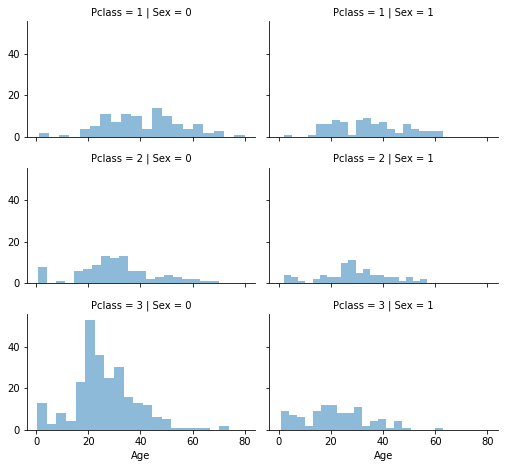

In [ ]:
# visualisasi jumlah selamat berdasarkan umur, dan dibagi berdasarkan pclass dan sex
# grid = sns.FacetGrid(train_df, col='Pclass', hue = 'Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
# persiapan untuk membuat  6 nilai umur baru untuk completing berdasarkan distribusi kombinasi umur diatas
guess_ages = np.zeros((2,3))
# jadi setiap kombinasi hanya 1 umur yang keluar, tidak berbeda2 (random)
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# pengisian dataset untuk kolom umur yang kosong berdasarkan kombinasi sex dan pclass
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [ ]:
# ketika data umur sudah leangkap, saatnya membuat pengelompokkan umur
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [ ]:
# ketika batas sudah ditentukan, saatnya mengubah umur2 tersebut menjadi kategorial numerik
for dataset in combine :
  dataset.loc[ dataset['Age'] <= 16, 'Age']  = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age']  = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age']

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [ ]:
# menghilangkan fitur ageband karena tidak perlu
train_df = train_df.drop(['AgeBand'], axis =1)
combine = [train_df, test_df]
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [ ]:
# penggabungan (combining) 2 fitur yaitu sibsp dan parch dengan operasi penjumlahan
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
# membuat fitur isalone yaitu berdasarkan jumlah keluarga yg dibawa, jika hanya 1 (artinya penumpang itu sendiri), maka dinyatakan sebagai isAlone (bernilai 1), jika tidak bernilai 0
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
# as_index artinya tidak menjadikan fitur acuan sebagai index
# train_df[['IsAlone', 'Survived']].groupby(['IsAlone']).mean()

In [ ]:
# pengeluaran fitur yang sudahtidak perlu digunakan karena telah dibuat fitur baru yang lebih simple
train_df = train_df.drop(['Parch','SibSp','FamilySize'], axis=1)
test_df  = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [ ]:
# menggabungkan 2 fitur dengan cara operasional matematika
for dataset in combine:
  dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)


,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [ ]:
# mencari modus untuk mengambil kejadian paling banyak yang bisa diisi ke nilai kosong
# di fitur berjenis kategorial
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port 

'S'

In [ ]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
#  bisa menggunakan mode [0] karena tipe series (1 dimensi)
type(train_df.Embarked.dropna().mode())

pandas.core.series.Series

In [ ]:
#  tidak bisa karena tipe data 2 dimensi
type(train_df[['Embarked']].mode())

pandas.core.frame.DataFrame

In [ ]:
# mengubah kategorial string menjadi numerik
for dataset in combine :
  dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C' : 1, 'Q':2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [ ]:
# karena hanya test yang hilang, completing hanya dilakukan di data test, menggunakan median
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [ ]:
# a= 2
# b =4
# c = [a,b]
# print(c)
# for aa in c :
#   aa = 3
# print(a)

In [ ]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [ ]:
# Membuat model
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [ ]:
# menghitung koefisien di model logreg
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [ ]:
pd.DataFrame(train_df.columns.delete(0))

,0
0,Pclass
1,Sex
2,Age
3,Fare
4,Embarked
5,Title
6,IsAlone
7,Age*Class


In [ ]:
# Hasil  nilai confidence svm lebih kecil dari logreg
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

In [ ]:
# hasil knn lebih tinggi dari logreg, dan svm
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [ ]:
# nilai confidence Naive bayes paling kecil diantara yang lain
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [ ]:
# algo model perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.01

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.23

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,78.23
4,Naive Bayes,72.28
